# 1. 免学部分
* p115~p119
* p123
* 扣除免学部分还有10面
* 但是这一章还是干货很多

# 2. 前言

* 大家在做题目前一定要先把第6章的书读一下
* 写本作业，请使用 Anaconda 里的 Notebook
* 我做了一个[打包下载 Link](https://downgit.github.io/#/home?url=https://github.com/liuhui998/pe2/tree/master/06-tidy), 大家下载下来解压后，使用 Notebook 打开

# 3. 学习概要
* 我会在每道题有前标明对的书页码
* 如果超纲我会提前提示，并加上资料 Link
---
重点知识：

整洁数据(Tidy Data), Peter起名叫: 数据 MECE 原则:

* 每个观测值成一行
* 每个变量成一列
* 每种观测单元构成一个表格

求卓越的同学可以扫一眼这篇论文：[数据整理（Tidy Data）—翻译Hadley Wickham的一篇论文](https://zhuanlan.zhihu.com/p/27579776)

---
知识点整理
*  pd.melt 把宽表变成窄表  [Pandas melt 使用](https://blog.csdn.net/maymay_/article/details/80039677)
*  df.pivot_table 数据透视 [一文看懂 Pandas 透视表](https://zhuanlan.zhihu.com/p/31952948)
*  [Pandas之drop_duplicates：去除重复项](https://blog.csdn.net/u010665216/article/details/78559091)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # 我们这里导入了 seaborn包，为了使用里面的示例数据
pd.options.plotting.backend = "plotly"

# 4. 把宽表打成窄表
--- 
备注：这里综合了 p113~p114面的内容

* 你现在负责分析各个bu的费用情况
* 现在上游的同学，已经把各个 bu 数据做了初步汇总
* 现在你要进行更细的分析
* 目的是为了：每个观测值成一行，每个变量成一列
---
* 读取 total_stat.xlsx 到 total_stat (pd.read_excel)
   
   第1列是  BG名字(bg_name), BU名字(bu_name), 后面12列是 1～12月的费用情况

* 将 total_stat 由一张宽表打成一张窄表 (pd.melt)
  
  保留 bg_name, bu_name 两列 （id_vars = ['bg_name','bu_name'])
  
  var_name 为 "month", value_name 为 "RMB"

* 统计每个 BU 的费用情况，并且按费用进行降序排序( groupby, sum, sort_values(by="col_name",ascending = False)
  
 

In [2]:
#读取 total_stat.xlsx 到 total_stat (pd.read_excel)
#   第1列是  BG名字(bg_name), BU名字(bu_name), 后面12列是 1～12月的费用情况
total_stat = pd.read_excel("total_stat.xlsx")
total_stat

,bg_name,bu_name,1,2,3,4,5,6,7,8,9,10,11,12
0,bg1,bu1,5467.222,6119.272,6428.870,6838.630,7535.284,8161.699,8532.240,8890.367,9697.996,10410.980,10692.954,10989.907
1,bg1,bu2,5386.665,5868.937,6274.798,6959.654,7504.437,7842.309,8680.299,8833.455,9483.944,9567.996,10480.824,10923.893
2,bg1,bu3,5392.393,5689.783,6500.498,7125.848,7584.676,8147.405,8145.477,9124.116,9840.914,9949.162,10277.647,10902.508
3,bg1,bu4,5582.793,6286.096,6482.942,6834.499,7563.993,7970.268,8390.084,9030.530,9644.366,10286.829,10709.009,11120.916
4,bg1,bu5,5491.237,6153.557,6387.314,6891.101,7436.566,8013.031,8696.517,8650.798,9357.792,9898.767,10594.913,11168.479
5,bg2,bu6,5482.094,6004.464,6580.063,7226.837,7456.125,8101.319,8509.066,8885.525,9668.551,10037.893,10639.045,10811.615
6,bg2,bu7,5522.656,5950.143,6411.400,7040.668,7481.248,7869.850,8654.708,9059.935,9494.008,10007.371,10424.638,11024.437
7,bg2,bu8,5379.041,6127.860,6544.731,6822.718,7375.903,8116.186,8836.734,9109.103,9468.940,9920.194,10626.707,11001.860
8,bg2,bu9,5575.877,6061.478,6416.372,7212.259,7310.406,8122.829,8562.822,9183.553,9617.876,9815.059,10402.755,11059.499
9,bg2,buX,5456.356,5972.015,6482.856,7143.421,7644.347,7845.157,8480.400,9057.831,9408.584,10003.083,10642.889,10809.798


In [3]:
#将 total_stat 由一张宽表打成一张窄表 (pd.melt)
#保留 bg_name, bu_name 两列 （id_vars = ['bg_name','bu_name'])
#var_name 为 "month", value_name 为 "RMB"

total = pd.melt(
    total_stat,
    id_vars = ["bg_name",'bu_name'],
    var_name = "month",
    value_name = "RMB"
)
total

,bg_name,bu_name,month,RMB
0,bg1,bu1,1,5467.222
1,bg1,bu2,1,5386.665
2,bg1,bu3,1,5392.393
3,bg1,bu4,1,5582.793
4,bg1,bu5,1,5491.237
...,...,...,...,...
115,bg2,bu6,12,10811.615
116,bg2,bu7,12,11024.437
117,bg2,bu8,12,11001.860
118,bg2,bu9,12,11059.499


In [4]:
#统计每个 BU 的费用情况，并且按费用进行降序排序
#( groupby, sum, sort_values(by="col_name",ascending = False)
# 学习时习之！
total.groupby(["bu_name"]).sum().sort_values(by="RMB",ascending = False)

,RMB
bu_name,
bu4,99902.325
bu1,99765.421
bu6,99402.597
bu9,99340.785
bu8,99329.977
buX,98946.737
bu7,98941.062
bu5,98740.072
bu3,98680.427


# 5. 数据透视表

---
备注：这里综合了 p113~p114面的内容，同时我们也会介绍很多书上没有使用的参数

* 我们现在分析泰坦尼克号生还者的数据
* 我们想知道生还者的构成，想知道Jack为什么会死
* pivot_table 也是 melt 的逆向操作，
  pivot_table 是 DataFrame 对象的一个成员函数，而 melt 是 pandas(pd) 下的一个函数
  
---
* 我现在给大家导入了一个叫 titanic 的 DataFrame

* 里面每行数据代表一个乘客数据（同学们这个数据后面都代表着一个鲜活的生命)

  字段介绍
  
  survived (是否生还, 1代表生还，0代表未生还)
  
  sex      (性别)
  
  age      (年龄)
  
  fare     (船票价)
  
  class    (在什么等级的船舱, First/Second/Third)
  
* 建一个透视表， 索引名是 sex, 列名是船舱等级，值是生还比 (df.pivot_table)
   
   index = "sex", columns ="class", values = "survived"
   
   因为 pivot_table 会自动算平均，所以会自动算出生还比
   
*  按是否成年来分析生还数据   

*  使用 aggfunc 参数来统计还人数
  
---
相关资料：

* [一文看懂 Pandas 透视表](https://zhuanlan.zhihu.com/p/31952948)
* [Python: Pandas中stack和unstack的形象理解](https://blog.csdn.net/anshuai_aw1/article/details/82830916) #补充资料，选 学


In [5]:
#我现在给大家导入了一个叫 titanic 的 DataFrame （非题目）
titanic = sns.load_dataset("titanic")
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
''' （非题目）
  里面每行数据代表一个乘客数据（同学们这个数据后面都代表着一个鲜活的生命)
  字段介绍：
  survived (是否生还, 1代表生还，0代表未生还)  
  sex      (性别)  
  age      (年龄)
  fare     (船票价)
  class    (在什么等级的船舱, First/Second/Third)
'''  
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
'''
建一个透视表， 索引名是 sex, 列名是船舱等级，值是生还比 (df.pivot_table)   
   index = "sex", columns ="class", values = "sumrvived"   
   因为 pivot_table 会自动算平均，所以会自动算出生还比
'''   
titanic.pivot_table(index='sex',columns='class',values='survived')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [8]:
# 给大家出一个思考题，看了上面的数据，大家会有什么样的结论


### 下面解释一下，如果不用 pivot_table 函数，怎么生透视表

In [9]:
# 对titanic按 sex（性别）,class（船仓） 进行 groupby 分组
# 最后对 survived (生还数据) 求平均，算出不同组合下的生还率
t = titanic.groupby(['sex','class'])['survived'].mean()
t

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [10]:
# 因为是对 'sex','class' 两列进行分组
# 所以索引也有两列
t.index

MultiIndex([('female',  'First'),
            ('female', 'Second'),
            ('female',  'Third'),
            (  'male',  'First'),
            (  'male', 'Second'),
            (  'male',  'Third')],
           names=['sex', 'class'])

In [11]:
#  使用unstack, 把一列索引打成层次化索引
#  老实讲 unstack 我也不大熟，大家可以看文档
t.unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [12]:
# 按是否成年来分析生还数据 （非题目）
#  有同学之前问怎么按价格段进行分析
# 那么我这理按年龄段进行分析，大家可以把它套用到业务上
# 先按年龄段来对 age 进行数据分组
age = pd.cut(titanic['age'],[0,18,80])
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [13]:
# 对非组数据进行去重(非题目)
age.unique()

[(18.0, 80.0], NaN, (0.0, 18.0]]
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [14]:
# 把年龄分组（age)加入到 index 参数中 （非题目）
titanic.pivot_table(
    index=['sex',age],
    columns='class',
    values="survived"
)

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [15]:
# 使用 aggfunc 参数来统计还人数
# 求各个舱位(class)的平均(mean)票价(fare)
# 求各个舱位(class)的总共(sum)总生还人数(fare)
titanic.pivot_table(
    index='sex', 
    columns='class',
    aggfunc={
        'survived': 'sum',
        'fare': 'mean'
    }    
)

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [16]:
# 为每行每列加上统计值 （非题目）
titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


# 6. 订单数据表拆分(大表变小表）

--- 
备注：这里综合了 p122面的内容

* 主要考查了如何从 DataFrame 选择若干列数据
* 如何使用 df.drop_duplicates() 删除重复数据
  
  [Pandas之drop_duplicates：去除重复项](https://blog.csdn.net/u010665216/article/details/78559091)

---
实现数据MECE原则

* 你现在是系统数据架构师，要重构历史的订单全表

* 订单全表里同时有 订单号(order_no), 产品名(name), 产品编号(sku), 数量字段(quantity)

* 从数据整洁性来说，应把订单全表(full_orders)拆成两个表: 产品表(products)，订单表(orders)

* 这些操作也是为了符合每种观测单元构成一张表格的规则
---

* 读取 full_orders.xlsx 到 full_orders

* 从 full_orders 取 ['order_no','sku','quantity'] 3列数据生成 orders,
  同时把orders 保存到 orders.xlsx(不保存索引, index = False)

* 从 full_orders 取 ['sku','name'] 2列数据生成 products ;   
  对products去掉重复数据，同时把 products 保存到 products.xlsx(不保存索引, index = False)


In [17]:
#读取 full_orders.xlsx 到 full_orders
full_orders = pd.read_excel("full_orders.xlsx")
full_orders

,order_no,name,sku,quantity
0,O_2020_01,AirPods,A1234,2
1,O_2020_02,AirPods,A1234,2
2,O_2020_03,MacBookPro,A1235,1
3,O_2020_04,MacBookPro,A1235,1


In [18]:
#从 full_orders 取 ['order_no','sku','quantity'] 3列数据生成 orders,
#  同时把orders 保存到 orders.xlsx(不保存索引, index = False)
orders = full_orders[['order_no','sku','quantity']]
orders.to_excel("orders.xlsx",index = False)
orders

,order_no,sku,quantity
0,O_2020_01,A1234,2
1,O_2020_02,A1234,2
2,O_2020_03,A1235,1
3,O_2020_04,A1235,1


In [19]:
products = full_orders[['sku','name']]
products

,sku,name
0,A1234,AirPods
1,A1234,AirPods
2,A1235,MacBookPro
3,A1235,MacBookPro


In [20]:
#从 full_orders 取 ['sku','name'] 2列数据生成 products ;   
#  对products去掉重复数据，同时把 products 保存到 products.xlsx(不保存索引, index = False)
products = full_orders[['sku','name']]
products = products.drop_duplicates()
products.to_excel("products.xlsx",index = False)
products

,sku,name
0,A1234,AirPods
2,A1235,MacBookPro


# 7. 加载多个文件并合并
--- 
备注：这里综合了 p125~p126面的内容

* 这里主要考查用 for 循环里字符串拼接文件路径

* 还使用之前的 pd.concat 拼接 DataFrame

* 求卓越的同学，可以再看 glob.glob 用法(书p124)

 [python glob模块](https://blog.csdn.net/csapr1987/article/details/7469769)  [python glob.glob使用](https://blog.csdn.net/mantoureganmian/article/details/47949101)
 
---
背景:
    
* 你现在负责分析公司2019年的费用数据

* 公司这一年的费用数据分散在 120 个 Excel 中，你现在要负责把它们合并起来

---

* 定义一个空的列表 df_list

* 定义 bu_names = ["bu1","bu2","bu3","bu4","bu5","bu6","bu7","bu8","bu9","buX"] 

  里面存储了所有的 bu 名
  

* 2019 目录下有所有10个bu 的12个月的数据

* 文件的命名路径的规则是 年/月/bu名.xlsx


* 按上面的命名规则遍历2019目录下的所的xlsx文件, 把它读到 df, 然后再添加到 df_list 中

* 将 df_list 里的 DataFrame 合并到一个 DataFrame 中，名叫 df_total



In [21]:
#定义一个空的列表 df_list
df_list = []

In [22]:
#定义 bu_names = ["bu1","bu2","bu3","bu4","bu5","bu6","bu7","bu8","bu9","buX"]
#里面存储了所有的 bu 名
bu_names = ["bu1","bu2","bu3","bu4","bu5","bu6","bu7","bu8","bu9","buX"]

In [23]:
#2019 目录下有所有10个bu 的12个月的数据
#文件的命名路径的规则是 年/月/bu名.xlsx
#按上面的命名规则遍历2019目录下的所的xlsx文件, 把它读到 df, 然后再添加到 df_list 中
for month_index in range(1,13):
    for bu_name in bu_names:
        file_name = "2019/%d/%s.xlsx" % (month_index,bu_name)
        print(file_name)
        df = pd.read_excel(file_name)
        print(df.shape)
        df_list.append(df)
        

2019/1/bu1.xlsx
(1000, 4)
2019/1/bu2.xlsx
(1000, 4)
2019/1/bu3.xlsx
(1000, 4)
2019/1/bu4.xlsx
(1000, 4)
2019/1/bu5.xlsx
(1000, 4)
2019/1/bu6.xlsx
(1000, 4)
2019/1/bu7.xlsx
(1000, 4)
2019/1/bu8.xlsx
(1000, 4)
2019/1/bu9.xlsx
(1000, 4)
2019/1/buX.xlsx
(1000, 4)
2019/2/bu1.xlsx
(1000, 4)
2019/2/bu2.xlsx
(1000, 4)
2019/2/bu3.xlsx
(1000, 4)
2019/2/bu4.xlsx
(1000, 4)
2019/2/bu5.xlsx
(1000, 4)
2019/2/bu6.xlsx
(1000, 4)
2019/2/bu7.xlsx
(1000, 4)
2019/2/bu8.xlsx
(1000, 4)
2019/2/bu9.xlsx
(1000, 4)
2019/2/buX.xlsx
(1000, 4)
2019/3/bu1.xlsx
(1000, 4)
2019/3/bu2.xlsx
(1000, 4)
2019/3/bu3.xlsx
(1000, 4)
2019/3/bu4.xlsx
(1000, 4)
2019/3/bu5.xlsx
(1000, 4)
2019/3/bu6.xlsx
(1000, 4)
2019/3/bu7.xlsx
(1000, 4)
2019/3/bu8.xlsx
(1000, 4)
2019/3/bu9.xlsx
(1000, 4)
2019/3/buX.xlsx
(1000, 4)
2019/4/bu1.xlsx
(1000, 4)
2019/4/bu2.xlsx
(1000, 4)
2019/4/bu3.xlsx
(1000, 4)
2019/4/bu4.xlsx
(1000, 4)
2019/4/bu5.xlsx
(1000, 4)
2019/4/bu6.xlsx
(1000, 4)
2019/4/bu7.xlsx
(1000, 4)
2019/4/bu8.xlsx
(1000, 4)
2019/4/bu9.x

In [24]:
#将 df_list 里的 DataFrame 合并到一个 DataFrame 中，名叫 df_total (pd.concat)
df_total = pd.concat(df_list)
df_total.shape

(120000, 4)

In [25]:
# （非题目）
df_total.head()

,bu_name,type,rmb,date
0,bu1,G,9089,2019-01-26
1,bu1,M,1570,2019-01-17
2,bu1,E,1511,2019-01-05
3,bu1,B,6998,2019-01-18
4,bu1,I,1331,2019-01-09


In [26]:
# 每一行记录，增加年/月字段（非题目）
# dt 用来处理日期数据
total_copy = df_total.copy()
total_copy['year'] = total_copy.date.dt.year
total_copy['month'] = total_copy.date.dt.month
total_copy.head()


,bu_name,type,rmb,date,year,month
0,bu1,G,9089,2019-01-26,2019,1
1,bu1,M,1570,2019-01-17,2019,1
2,bu1,E,1511,2019-01-05,2019,1
3,bu1,B,6998,2019-01-18,2019,1
4,bu1,I,1331,2019-01-09,2019,1


In [27]:
# 按月计算分组计费用 (非题目)
total_rmb_trend = total_copy.groupby('month')['rmb'].sum()
total_rmb_trend

month
1      54736334
2      60233605
3      64509844
4      70095635
5      74892985
6      80190053
7      85488347
8      89825213
9      95682971
10     99897334
11    105491381
12    109812912
Name: rmb, dtype: int64

In [30]:
# 画图看费用趋势（非题目）
trend_fig = total_rmb_trend.plot()
trend_fig.show()

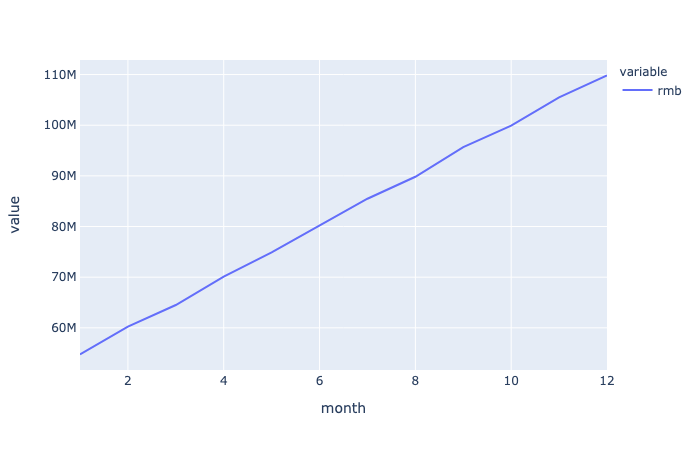

In [32]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
trend_fig.show('png')

# 8. 参考资料
* [一文看懂 Pandas 透视表](https://zhuanlan.zhihu.com/p/31952948)
* pd.melt 把宽表变成窄表  [Pandas melt 使用](https://blog.csdn.net/maymay_/article/details/80039677)
* [python glob模块](https://blog.csdn.net/csapr1987/article/details/7469769)
* [python glob.glob使用](https://blog.csdn.net/mantoureganmian/article/details/47949101)
* [Pandas之drop_duplicates：去除重复项](https://blog.csdn.net/u010665216/article/details/78559091)
* [Python3 pandas库 时间日期高效操作 .dt](https://zhuanlan.zhihu.com/p/31490318)
* [Python: Pandas中stack和unstack的形象理解](https://blog.csdn.net/anshuai_aw1/article/details/82830916) #补充资料，选 学